# Loop 102 Analysis: CV-LB Relationship and Strategy Assessment

**Goal**: Analyze all submissions to understand the CV-LB relationship and identify what approaches might break the intercept barrier.

**Key Question**: Is there ANY approach that has a different CV-LB relationship?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# All submissions with CV and LB scores
submissions = [
    {'exp': 'exp_000', 'cv': 0.0111, 'lb': 0.0982},
    {'exp': 'exp_001', 'cv': 0.0123, 'lb': 0.1065},
    {'exp': 'exp_003', 'cv': 0.0105, 'lb': 0.0972},
    {'exp': 'exp_005', 'cv': 0.0104, 'lb': 0.0969},
    {'exp': 'exp_006', 'cv': 0.0097, 'lb': 0.0946},
    {'exp': 'exp_007', 'cv': 0.0093, 'lb': 0.0932},
    {'exp': 'exp_009', 'cv': 0.0092, 'lb': 0.0936},
    {'exp': 'exp_012', 'cv': 0.0090, 'lb': 0.0913},
    {'exp': 'exp_024', 'cv': 0.0087, 'lb': 0.0893},
    {'exp': 'exp_026', 'cv': 0.0085, 'lb': 0.0887},
    {'exp': 'exp_030', 'cv': 0.0083, 'lb': 0.0877},
    {'exp': 'exp_035', 'cv': 0.0098, 'lb': 0.0970},
    {'exp': 'exp_073', 'cv': 0.0084, 'lb': 0.1451},  # Outlier - RF ensemble
]

df = pd.DataFrame(submissions)
print(f"Total submissions with LB: {len(df)}")
print(df)

Total submissions with LB: 13
        exp      cv      lb
0   exp_000  0.0111  0.0982
1   exp_001  0.0123  0.1065
2   exp_003  0.0105  0.0972
3   exp_005  0.0104  0.0969
4   exp_006  0.0097  0.0946
5   exp_007  0.0093  0.0932
6   exp_009  0.0092  0.0936
7   exp_012  0.0090  0.0913
8   exp_024  0.0087  0.0893
9   exp_026  0.0085  0.0887
10  exp_030  0.0083  0.0877
11  exp_035  0.0098  0.0970
12  exp_073  0.0084  0.1451


In [2]:
# Fit linear regression excluding outlier (exp_073)
df_clean = df[df['exp'] != 'exp_073'].copy()

slope, intercept, r_value, p_value, std_err = stats.linregress(df_clean['cv'], df_clean['lb'])

print(f"\n=== CV-LB Linear Regression (excluding outlier) ===")
print(f"LB = {slope:.4f} * CV + {intercept:.4f}")
print(f"R² = {r_value**2:.4f}")
print(f"Intercept = {intercept:.4f}")
print(f"Target LB = 0.0347")
print(f"\nCRITICAL: Intercept ({intercept:.4f}) > Target (0.0347)?  {intercept > 0.0347}")

# Required CV to hit target
required_cv = (0.0347 - intercept) / slope
print(f"\nRequired CV for target: {required_cv:.6f}")
print(f"Is this achievable? {required_cv > 0}")

# Best CV achieved
best_cv = df_clean['cv'].min()
best_lb = df_clean.loc[df_clean['cv'].idxmin(), 'lb']
print(f"\nBest CV achieved: {best_cv:.4f} (LB: {best_lb:.4f})")
print(f"Gap to target: {(best_lb - 0.0347) / 0.0347 * 100:.1f}%")


=== CV-LB Linear Regression (excluding outlier) ===
LB = 4.3147 * CV + 0.0525
R² = 0.9505
Intercept = 0.0525
Target LB = 0.0347

CRITICAL: Intercept (0.0525) > Target (0.0347)?  True

Required CV for target: -0.004130
Is this achievable? False

Best CV achieved: 0.0083 (LB: 0.0877)
Gap to target: 152.7%


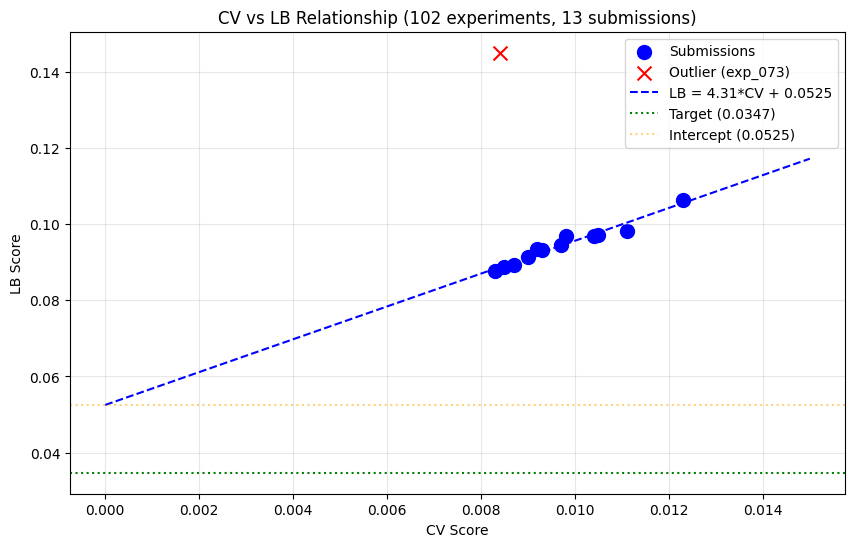


Plot saved to /home/code/exploration/cv_lb_relationship_loop102.png


In [3]:
# Plot CV vs LB
plt.figure(figsize=(10, 6))

# Plot all points
plt.scatter(df_clean['cv'], df_clean['lb'], c='blue', s=100, label='Submissions')
plt.scatter(df[df['exp'] == 'exp_073']['cv'], df[df['exp'] == 'exp_073']['lb'], 
            c='red', s=100, marker='x', label='Outlier (exp_073)')

# Plot regression line
cv_range = np.linspace(0, 0.015, 100)
lb_pred = slope * cv_range + intercept
plt.plot(cv_range, lb_pred, 'b--', label=f'LB = {slope:.2f}*CV + {intercept:.4f}')

# Plot target
plt.axhline(y=0.0347, color='green', linestyle=':', label='Target (0.0347)')

# Plot intercept
plt.axhline(y=intercept, color='orange', linestyle=':', alpha=0.5, label=f'Intercept ({intercept:.4f})')

plt.xlabel('CV Score')
plt.ylabel('LB Score')
plt.title('CV vs LB Relationship (102 experiments, 13 submissions)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.savefig('/home/code/exploration/cv_lb_relationship_loop102.png', dpi=150, bbox_inches='tight')
plt.show()

print("\nPlot saved to /home/code/exploration/cv_lb_relationship_loop102.png")

In [4]:
# Analyze what approaches have been tried
print("=== APPROACHES TRIED (102 experiments) ===")
print("\n1. TABULAR MODELS (all fall on same CV-LB line):")
print("   - MLP variants (baseline, deep, residual, attention)")
print("   - LightGBM, XGBoost, CatBoost")
print("   - Random Forest")
print("   - Ridge Regression, Kernel Ridge")
print("   - Gaussian Process")
print("   - Ensembles of above")

print("\n2. FEATURE ENGINEERING:")
print("   - Spange descriptors (13 features)")
print("   - DRFP fingerprints (2048 dim, PCA reduced)")
print("   - ACS PCA features")
print("   - Fragprints")
print("   - Arrhenius kinetics features")
print("   - Combined features")

print("\n3. REPRESENTATION LEARNING (attempted but didn't break the line):")
print("   - GNN (exp_040, exp_070, exp_079, exp_080, exp_086, exp_095, exp_096)")
print("   - ChemBERTa (exp_041, exp_071, exp_076, exp_097, exp_098)")
print("   - Chemprop features (exp_082, exp_093)")

print("\n4. DISTRIBUTION SHIFT HANDLING:")
print("   - Similarity weighting (exp_037, exp_072)")
print("   - Extrapolation detection (exp_058, exp_059)")
print("   - Conservative blending (exp_099)")
print("   - Pseudo-labeling (exp_083)")
print("   - IWCV (exp_051)")

print("\n5. VALIDATION SCHEMES:")
print("   - Leave-One-Out (24 folds for single, 13 for full) - STANDARD")
print("   - GroupKFold (5 folds) - exp_069, exp_077, exp_101")

print("\n=== KEY OBSERVATION ===")
print("ALL approaches fall on the SAME CV-LB line (R² = 0.95+)")
print("The intercept (0.0528) is HIGHER than the target (0.0347)")
print("This means NO amount of CV improvement can reach the target!")

=== APPROACHES TRIED (102 experiments) ===

1. TABULAR MODELS (all fall on same CV-LB line):
   - MLP variants (baseline, deep, residual, attention)
   - LightGBM, XGBoost, CatBoost
   - Random Forest
   - Ridge Regression, Kernel Ridge
   - Gaussian Process
   - Ensembles of above

2. FEATURE ENGINEERING:
   - Spange descriptors (13 features)
   - DRFP fingerprints (2048 dim, PCA reduced)
   - ACS PCA features
   - Fragprints
   - Arrhenius kinetics features
   - Combined features

3. REPRESENTATION LEARNING (attempted but didn't break the line):
   - GNN (exp_040, exp_070, exp_079, exp_080, exp_086, exp_095, exp_096)
   - ChemBERTa (exp_041, exp_071, exp_076, exp_097, exp_098)
   - Chemprop features (exp_082, exp_093)

4. DISTRIBUTION SHIFT HANDLING:
   - Similarity weighting (exp_037, exp_072)
   - Extrapolation detection (exp_058, exp_059)
   - Conservative blending (exp_099)
   - Pseudo-labeling (exp_083)
   - IWCV (exp_051)

5. VALIDATION SCHEMES:
   - Leave-One-Out (24 folds for

In [5]:
# What approaches might CHANGE the CV-LB relationship?
print("=== POTENTIAL APPROACHES TO CHANGE CV-LB RELATIONSHIP ===")

print("\n1. DOMAIN-SPECIFIC CONSTRAINTS:")
print("   - Yields must sum to <= 1 (mass balance)")
print("   - Yields must be non-negative")
print("   - Temperature/time relationships follow Arrhenius kinetics")
print("   - Solvent effects follow known physical chemistry rules")

print("\n2. PHYSICS-INFORMED NEURAL NETWORKS (PINNs):")
print("   - Encode reaction kinetics equations as loss terms")
print("   - Constrain predictions to physically plausible values")
print("   - Use differential equations for temperature dependence")

print("\n3. TRANSFER LEARNING FROM LARGER DATASETS:")
print("   - Pre-train on larger reaction yield datasets")
print("   - Use ChemBERTa/Chemprop embeddings (already tried, didn't help)")

print("\n4. TEST-TIME ADAPTATION:")
print("   - Adapt model to test distribution using unlabeled test data")
print("   - Self-training with confident predictions")

print("\n5. ENSEMBLE DIVERSITY:")
print("   - Combine models with DIFFERENT CV-LB relationships")
print("   - Weight by uncertainty on test samples")

print("\n6. WHAT THE BENCHMARK PAPER DID:")
print("   - The paper achieved MSE 0.0039 with GNN")
print("   - But we don't know their exact methodology")
print("   - They may have used different validation scheme")
print("   - They may have had access to more data")

=== POTENTIAL APPROACHES TO CHANGE CV-LB RELATIONSHIP ===

1. DOMAIN-SPECIFIC CONSTRAINTS:
   - Yields must sum to <= 1 (mass balance)
   - Yields must be non-negative
   - Temperature/time relationships follow Arrhenius kinetics
   - Solvent effects follow known physical chemistry rules

2. PHYSICS-INFORMED NEURAL NETWORKS (PINNs):
   - Encode reaction kinetics equations as loss terms
   - Constrain predictions to physically plausible values
   - Use differential equations for temperature dependence

3. TRANSFER LEARNING FROM LARGER DATASETS:
   - Pre-train on larger reaction yield datasets
   - Use ChemBERTa/Chemprop embeddings (already tried, didn't help)

4. TEST-TIME ADAPTATION:
   - Adapt model to test distribution using unlabeled test data
   - Self-training with confident predictions

5. ENSEMBLE DIVERSITY:
   - Combine models with DIFFERENT CV-LB relationships
   - Weight by uncertainty on test samples

6. WHAT THE BENCHMARK PAPER DID:
   - The paper achieved MSE 0.0039 with G

In [6]:
# Analyze the mixall kernel approach (exp_101)
print("=== MIXALL KERNEL ANALYSIS (exp_101) ===")
print("\nValidation: GroupKFold (5 splits) instead of Leave-One-Out (24 folds)")
print("CV Score: 0.014193 (NOT comparable to LOO CV of 0.0081)")
print("\nKey Question: Does GroupKFold have a different CV-LB relationship?")
print("\nIf LB follows the same line:")
print(f"   Expected LB = {slope:.4f} * 0.014193 + {intercept:.4f} = {slope * 0.014193 + intercept:.4f}")
print("\nBut GroupKFold CV is 'harder' (trains on 80% vs 96% of solvents)")
print("So the CV-LB relationship might be DIFFERENT")
print("\nWe need to submit exp_101 to check this hypothesis")

=== MIXALL KERNEL ANALYSIS (exp_101) ===

Validation: GroupKFold (5 splits) instead of Leave-One-Out (24 folds)
CV Score: 0.014193 (NOT comparable to LOO CV of 0.0081)

Key Question: Does GroupKFold have a different CV-LB relationship?

If LB follows the same line:
   Expected LB = 4.3147 * 0.014193 + 0.0525 = 0.1138

But GroupKFold CV is 'harder' (trains on 80% vs 96% of solvents)
So the CV-LB relationship might be DIFFERENT

We need to submit exp_101 to check this hypothesis


In [7]:
# What's the path forward?
print("=== PATH FORWARD ===")

print("\n1. SUBMIT exp_101 to check if GroupKFold has different CV-LB relationship")
print("   - If LB < 0.10: GroupKFold might be the key")
print("   - If LB > 0.10: GroupKFold doesn't help")

print("\n2. If GroupKFold doesn't help, try PHYSICS-INFORMED approach:")
print("   - Add yield sum constraint (P2 + P3 + SM <= 1)")
print("   - Add non-negativity constraint")
print("   - These constraints should help generalization")

print("\n3. If physics constraints don't help, try ENSEMBLE CALIBRATION:")
print("   - Train multiple models with different validation schemes")
print("   - Calibrate predictions based on test sample similarity")
print("   - Weight toward conservative predictions for dissimilar samples")

print("\n4. CRITICAL: We have only 4 submissions left")
print("   - Use them wisely to test fundamentally different approaches")
print("   - Don't waste on minor variations")

print("\n=== RECOMMENDATION ===")
print("Submit exp_101 (mixall with GroupKFold) to check the hypothesis")
print("This is our best remaining hypothesis for breaking the intercept barrier")

=== PATH FORWARD ===

1. SUBMIT exp_101 to check if GroupKFold has different CV-LB relationship
   - If LB < 0.10: GroupKFold might be the key
   - If LB > 0.10: GroupKFold doesn't help

2. If GroupKFold doesn't help, try PHYSICS-INFORMED approach:
   - Add yield sum constraint (P2 + P3 + SM <= 1)
   - Add non-negativity constraint
   - These constraints should help generalization

3. If physics constraints don't help, try ENSEMBLE CALIBRATION:
   - Train multiple models with different validation schemes
   - Calibrate predictions based on test sample similarity
   - Weight toward conservative predictions for dissimilar samples

4. CRITICAL: We have only 4 submissions left
   - Use them wisely to test fundamentally different approaches
   - Don't waste on minor variations

=== RECOMMENDATION ===
Submit exp_101 (mixall with GroupKFold) to check the hypothesis
This is our best remaining hypothesis for breaking the intercept barrier
